In [1]:
import importlib
import torch
import models
import hotrg_torch
from opt_einsum import contract
importlib.reload(models)
importlib.reload(hotrg_torch)


<module 'hotrg_torch' from 'c:\\Users\\timot\\OneDrive - The Chinese University of Hong Kong\\Desktop\\misc trash\\diff-hotrg\\hotrg_torch.py'>

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
#torch.set_default_dtype(torch.float64)
torch.set_default_device(device)
torch.get_default_device()

device(type='cuda', index=0)

In [4]:
import numpy as np
Tc = models.Ising2D.Tc
dlnZdT_th= []
d2lnZdT2_th = []
Nsamples = 100
Ts = np.linspace(0.8*Tc,1.2*Tc,Nsamples)
for T in np.linspace(0.8*Tc,1.2*Tc,Nsamples):
    with torch.autograd.detect_anomaly():
        temp = torch.Tensor([T]).to(device)
        temp.requires_grad_()
        model = models.Ising2D(temp)
        lnZ = model.get_lnZ()

        dlnZdT, = torch.autograd.grad(lnZ,temp,create_graph=True)
        d2lnZdT2, = torch.autograd.grad(dlnZdT,temp)
        dlnZdT_th.append(dlnZdT.item())
        d2lnZdT2_th.append(d2lnZdT2.item())
dlnZdT_th = np.array(dlnZdT_th)
d2lnZdT2_th = np.array(d2lnZdT2_th)

C:\Users\timot\AppData\Local\Temp\ipykernel_29704\3175973746.py:8: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():


Text(0, 0.5, 'energy density')

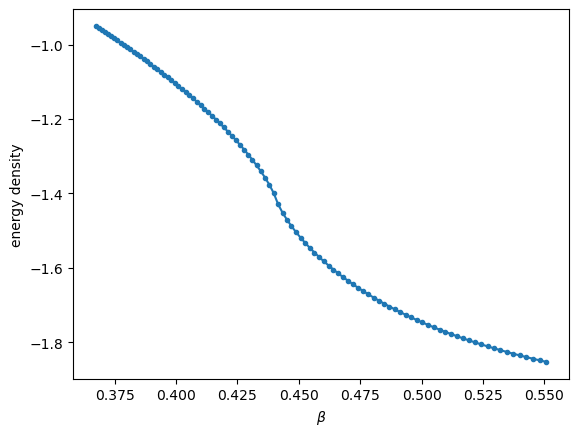

In [5]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(1/Ts,Ts*Ts*dlnZdT_th,marker='.')
plt.xlabel(r'$\beta$')
plt.ylabel(r'energy density')

Text(0, 0.5, 'heat capacity')

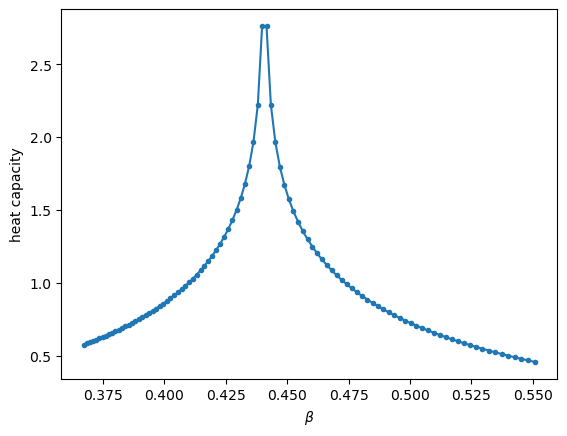

In [6]:
plt.plot(1/Ts,2*Ts*dlnZdT_th+Ts*Ts*d2lnZdT2_th,marker='.')
plt.xlabel(r'$\beta$')
plt.ylabel(r'heat capacity')

In [10]:
import numpy as np
Tc = models.Ising2D.Tc
dlnZdT_RG= []
d2lnZdT2_RG = []
for T in np.linspace(0.8*Tc,1.2*Tc,Nsamples)[:]:
  with torch.autograd.detect_anomaly():
    temp = torch.Tensor([T]).to(device)
    temp.requires_grad_()
    model = models.Ising2D(temp)
    hotrg = hotrg_torch.HOTRG(model,10,disable_ckpt=True)
    hotrg.run(15,verbose=False)
    lnZ = hotrg.get_lnZ()

    # Compute derivatives
    dlnZdT, = torch.autograd.grad(lnZ,temp,create_graph=True)
    
    d2lnZdT2, = torch.autograd.grad(dlnZdT,temp,create_graph=True)
    dlnZdT_RG.append(dlnZdT.item())
    d2lnZdT2_RG.append(d2lnZdT2.item())

C:\Users\timot\AppData\Local\Temp\ipykernel_29704\2845389149.py:6: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():


Renormalizing Ising2D
Current lattice size: 1	Current iterations: 0
Completed  15  iterations of renormalization
Saving output to ./Ising2D-chi10-T_1.81535.pt...
Renormalizing Ising2D
Current lattice size: 1	Current iterations: 0
Completed  15  iterations of renormalization
Saving output to ./Ising2D-chi10-T_1.82452.pt...
Renormalizing Ising2D
Current lattice size: 1	Current iterations: 0
Completed  15  iterations of renormalization
Saving output to ./Ising2D-chi10-T_1.83369.pt...
Renormalizing Ising2D
Current lattice size: 1	Current iterations: 0
Completed  15  iterations of renormalization
Saving output to ./Ising2D-chi10-T_1.84285.pt...
Renormalizing Ising2D
Current lattice size: 1	Current iterations: 0
Completed  15  iterations of renormalization
Saving output to ./Ising2D-chi10-T_1.85202.pt...
Renormalizing Ising2D
Current lattice size: 1	Current iterations: 0
Completed  15  iterations of renormalization
Saving output to ./Ising2D-chi10-T_1.86119.pt...
Renormalizing Ising2D
Curren

c:\Users\timot\miniconda3\envs\tensornet\Lib\site-packages\torch\autograd\graph.py:825: UserWarning: Error detected in LinalgSvdBackward0. Traceback of forward call that caused the error:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\timot\miniconda3\envs\tensornet\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\timot\miniconda3\envs\tensornet\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\timot\miniconda3\envs\tensornet\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "c:\Users\timot\miniconda3\envs\tensornet\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\timot\miniconda3\envs\tensornet\Lib\asyncio\base_events.py", line 608, in run_forever
    self._run_once()
  File

RuntimeError: Function 'LinalgSvdBackward0' returned nan values in its 0th output.

In [31]:
#d2lnZdT2_RG

In [33]:
#result = torch.load('./Ising2D-chi10-T_2.14975.pt')

In [ ]:
result['']

In [34]:
dlnZdT_RG = np.array(dlnZdT_RG)


Text(0, 0.5, 'Energy density')

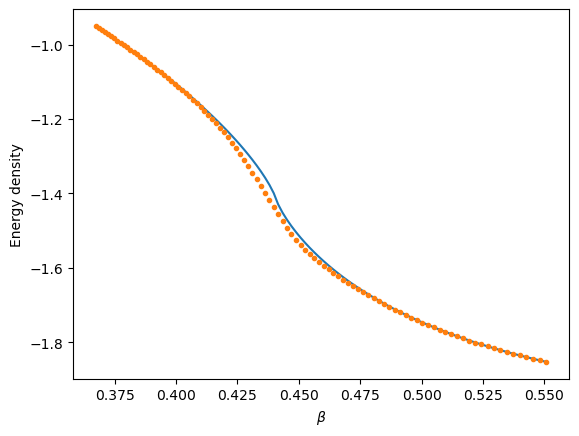

In [40]:

plt.plot(1/Ts,Ts*Ts*dlnZdT_th)
plt.plot(1/Ts,Ts*Ts*dlnZdT_RG,marker='.',linestyle='None')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Energy density')

Text(0.5, 0, '$\\beta$')

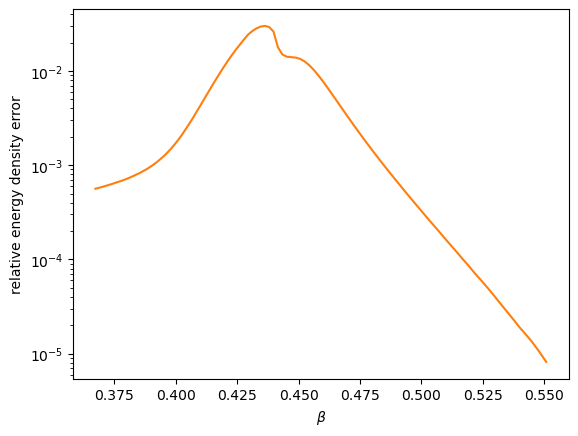

In [41]:
# Energy error 
E_RG = Ts*Ts*dlnZdT_RG
E_th = Ts*Ts*dlnZdT_th

plt.plot(1/Ts,np.abs((E_RG-E_th)/E_th),color='tab:orange')
plt.yscale('log')
plt.ylabel('relative energy density error')
plt.xlabel(r'$\beta$')

In [46]:
# Save the results so that you can plot it later
#np.savetxt("Ising scan chi10.txt",np.stack([Ts,dlnZdT_RG]).T)

Text(0, 0.5, 'Energy density')

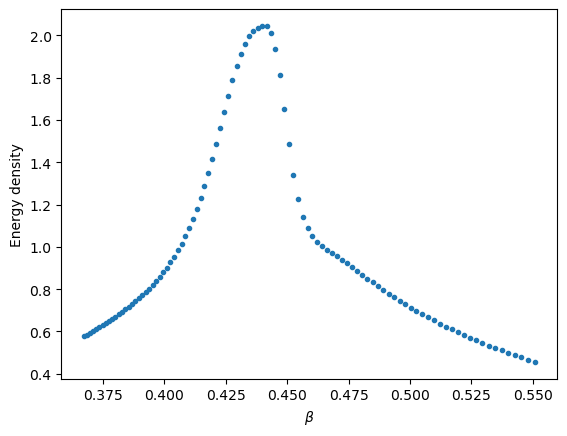

In [42]:

#plt.plot(1/Ts,Ts*Ts*dlnZdT_th)
plt.plot(1/Ts,2*Ts*dlnZdT_RG+Ts*Ts*d2lnZdT2_RG,marker='.',linestyle='None')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Energy density')